# Librerias

In [1]:
library(bnlearn)
library(Rgraphviz)

rtp = read.csv("data/ARIA_cleaned/PlanRT.csv", row.names=1)

Loading required package: graph

Loading required package: BiocGenerics

Loading required package: parallel



Error in setMethod("path", cl, where = topenv(parent.frame()), function(object,  : 
  the environment 'base' is locked; cannot assign methods for function 'path'



Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:bnlearn':

    path, score


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min




Error in setMethod("nodes", cl, where = topenv(parent.frame()), function(object) .nodes(object)) : 
  the environment 'base' is locked; cannot assign methods for function 'nodes'



Attaching package: 'graph'


The following objects are masked from 'package:bnlearn':

    degree, nodes, nodes<-


Loading required package: grid



# Datos

In [2]:
# cols = c('TreatmentOrder', 'PlanNormFactor_isNaN', 'PrescribedPercentage', 'Site', 'CityOrTownship', 'Status_x', 'Country', 'FractionPatternDigitsPerDay', 'Technique', 'SkinFlashMargin', 'TreatmentIntentType', 'DateOfBirth_isNaN', 'SimulationNeeded', 'StartDelay_isNaN', 'PrimaryPTVSer_isNaN', 'PlanNormMethod', 'FirstName', 'Status_y', 'TreatmentOrientation', 'Notes', 'DicomSeqNumber', 'FractionPattern', 'PrescribedDose_isNaN', 'BolusFrequency', 'EquipmentSer', 'PhaseType', 'CalcModelOptions', 'BolusThickness', 'InterfaceStamp', 'Intent', 'NumberOfFractions_isNaN', 'MultiFieldOptFlag', 'NoFractions_isNaN', 'ClinicalStatus', 'Sex')
# cols = c('PrescribedPercentage', 'NoFractions', 'PrescribedDose', 'Status_x', 'ClinicalStatus', 'MultiFieldOptFlag', 'DicomSeqNumber', 'SkinFlashMargin', 'StartDelay', 'BolusThickness', 'PlanNormMethod', 'FractionPattern', 'BolusFrequency', 'Technique', 'PhaseType', 'DateOfBirth', 'CalcModelOptions', 'Intent', 'PrimaryPTVSer', 'InterfaceStamp', 'TreatmentOrientation', 'CityOrTownship', 'PlanNormFactor', 'Site', 'NumberOfFractions', 'EquipmentSer', 'Status_y', 'CalcModelOptionsLen', 'Notes', 'TreatmentOrder', 'Sex', 'TreatmentIntentType', 'Country', 'FirstName', 'SimulationNeeded', 'FractionPatternDigitsPerDay')

# cols = setdiff(cols,  c('TreatmentIntentType', 'Country', 'Intent', 'PlanNormMethod',
#        'CalcModelOptions', 'SkinFlashMargin', 'InterfaceStamp',
#        'PrimaryPTVSer', 'StartDelay', 'Technique', 'NumberOfFractions',
#        'PrescriptionSer', 'PhaseType', 'Site', 'SimulationNeeded', 'Status_y',
#        'Notes', 'TreatmentOrder', 'FractionPatternDigitsPerDay',
#        'FractionPattern', 'BolusThickness', 'BolusFrequency'))

# cols = c('SkinFlashMargin', 'FractionPattern', 'Status_y', 'Technique', 'NoFractions', 'PlanNormMethod', 'DateOfBirth', 'PlanNormFactor', 'BolusThickness', 'Country', 'StartDelay', 'CalcModelOptions', 'Notes', 'TreatmentIntentType', 'PhaseType', 'TreatmentOrder', 'NumberOfFractions', 'InterfaceStamp', 'PrescribedPercentage', 'ClinicalStatus', 'Intent', 'PrescribedDose', 'DicomSeqNumber', 'Sex', 'PrimaryPTVSer', 'FractionPatternDigitsPerDay', 'TreatmentOrientation', 'FirstName', 'MultiFieldOptFlag', 'CalcModelOptionsLen', 'EquipmentSer', 'SimulationNeeded', 'Site', 'Status_x', 'CityOrTownship', 'BolusFrequency')
cols = c('PlanNormMethod', 'CityOrTownship', 'SimulationNeeded', 'Technique', 'PrescribedDose', 'DateOfBirth', 'NumberOfFractions', 'FractionPatternDigitsPerDay', 'FractionPattern', 'MStage', 'BolusFrequency', 'TreatmentIntentType', 'TreatmentOrientation', 'Sex', 'InterfaceStamp', 'SkinFlashMargin', 'NStage', 'PhaseType', 'HistologyCode', 'Status_y', 'BolusThickness', 'CalcModelOptions', 'FirstName', 'ClinicalStatus', 'DiagnosisCode_sec', 'DicomSeqNumber', 'Status_x', 'PrimaryPTVSer', 'Site', 'StartDelay', 'ObjectStatus', 'HistologyCode_sec', 'Intent', 'Notes', 'ObjectStatus_sec', 'TreatmentOrder', 'TumorSize', 'CalcModelOptionsLen', 'PlanNormFactor', 'DiagnosisCode', 'SummaryStage', 'EquipmentSer', 'TStage', 'Country', 'PrescribedPercentage', 'MultiFieldOptFlag', 'NoFractions')

length(cols)
cols

[1] 47

[1] "PlanNormMethod"              "CityOrTownship"             
 [3] "SimulationNeeded"            "Technique"                  
 [5] "PrescribedDose"              "DateOfBirth"                
 [7] "NumberOfFractions"           "FractionPatternDigitsPerDay"
 [9] "FractionPattern"             "MStage"                     
[11] "BolusFrequency"              "TreatmentIntentType"        
[13] "TreatmentOrientation"        "Sex"                        
[15] "InterfaceStamp"              "SkinFlashMargin"            
[17] "NStage"                      "PhaseType"                  
[19] "HistologyCode"               "Status_y"                   
[21] "BolusThickness"              "CalcModelOptions"           
[23] "FirstName"                   "ClinicalStatus"             
[25] "DiagnosisCode_sec"           "DicomSeqNumber"             
[27] "Status_x"                    "PrimaryPTVSer"              
[29] "Site"                        "StartDelay"                 
[31] "ObjectStatus"                "HistologyCode_sec"          
[33] "Intent"                      "Notes"                      
[35] "ObjectStatus_sec"            "TreatmentOrder"             
[37] "TumorSize"                   "CalcModelOptionsLen"        
[39] "PlanNormFactor"              "DiagnosisCode"              
[41] "SummaryStage"                "EquipmentSer"               
[43] "TStage"                      "Country"                    
[45] "PrescribedPercentage"        "MultiFieldOptFlag"          
[47] "NoFractions"

In [3]:
rtp[cols] <- lapply(rtp[cols], factor)

In [4]:
dim(rtp[cols])
head(rtp[cols])

[1] 14157    47

,PlanNormMethod,CityOrTownship,SimulationNeeded,Technique,PrescribedDose,DateOfBirth,NumberOfFractions,FractionPatternDigitsPerDay,FractionPattern,MStage,...,CalcModelOptionsLen,PlanNormFactor,DiagnosisCode,SummaryStage,EquipmentSer,TStage,Country,PrescribedPercentage,MultiFieldOptFlag,NoFractions
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
71,0\Mode\NoNormalization$0\Err\0$,isNaN,isNaN,isNaN,"(0.001, 2.0]",isNaN,isNaN,isNaN,isNaN,isNaN,...,"(-0.001, 7674.0]","(0.009000000000000001, 1.0]",isNaN,isNaN,1,isNaN,isNaN,1.0,0,"(10.0, 23.0]"
113,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,...,"(-0.001, 7674.0]","(0.009000000000000001, 1.0]",isNaN,isNaN,52,isNaN,isNaN,1.0,1,"(-0.001, 1.0]"
116,0\Mode\UserDefined$0...7578002517764764173,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,1.0,1111111.0,isNaN,...,"(-0.001, 7674.0]","(0.009000000000000001, 1.0]",isNaN,isNaN,52,isNaN,isNaN,1.0,0,"(-0.001, 1.0]"
117,0\Mode\UserDefined$0...7578002517764764173,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,1.0,1111111.0,isNaN,...,"(-0.001, 7674.0]","(0.009000000000000001, 1.0]",isNaN,isNaN,52,isNaN,isNaN,1.0,0,"(-0.001, 1.0]"
118,0\Mode\UserDefined$0...7578002517764764173,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,...,"(-0.001, 7674.0]","(0.009000000000000001, 1.0]",isNaN,isNaN,52,isNaN,isNaN,1.0,0,"(-0.001, 1.0]"
119,0\Mode\UserDefined$0...7578002517764764173,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,isNaN,...,"(-0.001, 7674.0]","(0.009000000000000001, 1.0]",isNaN,isNaN,52,isNaN,isNaN,1.0,0,"(-0.001, 1.0]"


# Aprendizaje de estructura

In [5]:
hcdag <- hc(rtp[cols])
tabudag <- tabu(rtp[cols])

In [6]:
bnlearn::score(hcdag, data = rtp[cols], type = "bic")
bnlearn::score(tabudag, data = rtp[cols], type = "bic")

arc.strength(hcdag, data = rtp[cols], criterion = "bic") # x2, aic...

# print(hcdag)
# plot(hcdag)
# print(tabudag)

[1] -384606.4

[1] -384606.4

,from,to,strength
,<chr>,<chr>,<dbl>
1,CalcModelOptions,CalcModelOptionsLen,-10896.88403
2,PlanNormMethod,Intent,-10596.18082
3,SummaryStage,TStage,-10210.57590
4,SkinFlashMargin,MultiFieldOptFlag,-9599.17441
5,NumberOfFractions,Site,-9390.07172
6,Technique,NumberOfFractions,-5391.88941
7,MStage,SummaryStage,-8645.15334
8,NumberOfFractions,PhaseType,-8513.76165
9,SummaryStage,DiagnosisCode,-8499.62138


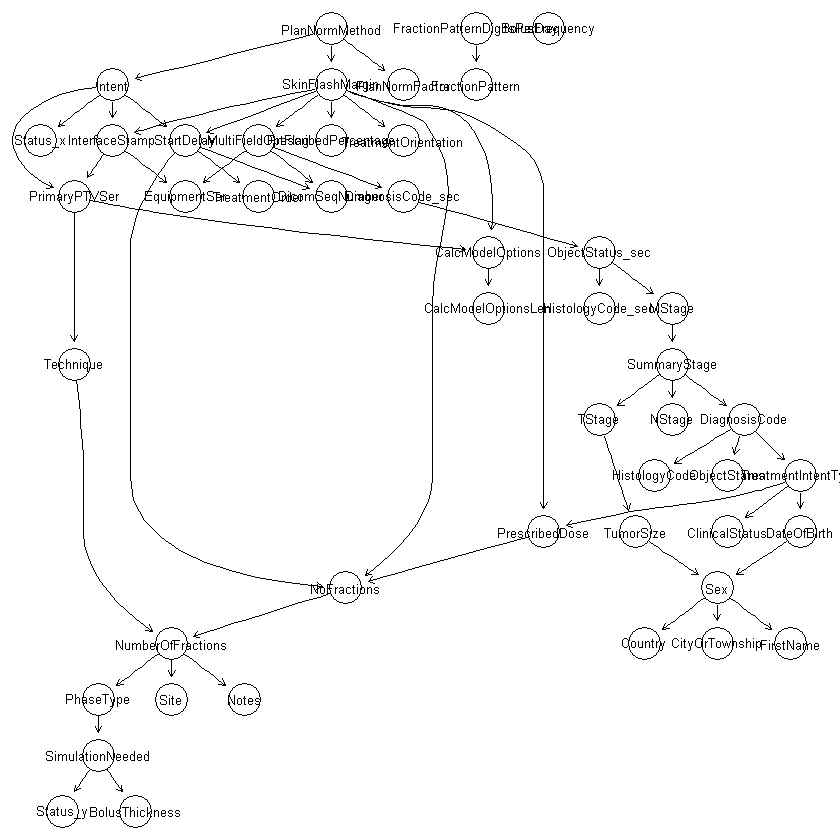

In [7]:
# graphviz.plot(hcdag)
# graphviz.plot(tabudag)

g <- Rgraphviz::layoutGraph(bnlearn::as.graphNEL(hcdag))
graph::nodeRenderInfo(g) <- list(fontsize=80)
Rgraphviz::renderGraph(g)

In [8]:
vstructs(hcdag)

X,Z,Y
TreatmentIntentType,PrescribedDose,SkinFlashMargin
Technique,NumberOfFractions,NoFractions
DateOfBirth,Sex,TumorSize
SkinFlashMargin,InterfaceStamp,Intent
SkinFlashMargin,CalcModelOptions,PrimaryPTVSer
StartDelay,DicomSeqNumber,MultiFieldOptFlag
SkinFlashMargin,StartDelay,Intent
InterfaceStamp,EquipmentSer,MultiFieldOptFlag
PrescribedDose,NoFractions,StartDelay


# Aprendizaje de parámetros

In [9]:
bn.bayes <- bn.fit(hcdag, data = rtp[cols], method = "bayes")
nparams(bn.bayes)
# bn.bayes$PrescribedPercentage
bn.bayes$NoFractions

[1] 5163


  Parameters of node NoFractions (multinomial distribution)

Conditional probability table:
 
, , SkinFlashMargin = 20.0, StartDelay = (-0.001, 2.0]

               PrescribedDose
NoFractions     (0.001, 2.0] (2.0, 2.017] (2.017, 2.67]  (2.67, 4.0]
  (-0.001, 1.0] 9.156405e-01 1.666667e-01  9.426022e-01 9.303577e-01
  (1.0, 4.0]    7.287625e-02 1.666667e-01  5.271809e-02 6.186317e-02
  (10.0, 23.0]  7.425387e-03 1.666667e-01  3.107819e-03 1.193118e-05
  (23.0, 800.0] 2.027377e-03 1.666667e-01  7.177411e-06 2.589066e-03
  (4.0, 10.0]   2.027377e-03 1.666667e-01  1.557498e-03 5.166201e-03
  isNaN         3.123848e-06 1.666667e-01  7.177411e-06 1.193118e-05
               PrescribedDose
NoFractions     (4.0, 9333.766]        isNaN
  (-0.001, 1.0]    9.565607e-01 9.885845e-01
  (1.0, 4.0]       3.798115e-02 2.283105e-03
  (10.0, 23.0]     8.371423e-06 2.283105e-03
  (23.0, 800.0]    8.371423e-06 2.283105e-03
  (4.0, 10.0]      5.433054e-03 2.283105e-03
  isNaN            8.371423e-06 2.28